In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
def kernel(a, b, theta):
    sqdist = np.sum(a**2, axis=1).reshape(-1, 1) + np.sum(b**2, axis=1) - 2*np.dot(a, b.T)
    return theta[0]*np.exp(-theta[1]/2 * sqdist) + theta[2] + theta[3]*a.dot(b.T)

def k(a, b, theta):
    return theta[0]*np.exp(-(theta[1]/2) * np.linalg.norm(a - b)**2) + theta[2] + theta[3] * a.T.dot(b)

In [3]:
def is_psd(A, tol=1e-8):
    eigen, _ = np.linalg.eigh(A)
    return np.all(E > -tol)

In [4]:
N = 101
theta = np.ones(4)
thetas = np.array([[1, 4, 0, 0],
                   [9, 4, 0, 0],
                   [1, 64, 0, 0],
                   [1, 0.25, 0, 0],
                   [1, 4, 10, 0],
                   [1, 4, 0, 5]])
X = np.linspace(-1, 1, N).reshape(N, 1)

In [6]:
K = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        K[i, j] = k(X[i, np.newaxis], X[j, np.newaxis], theta)
print(K)

[[ 3.          2.97980002  2.95920032 ...,  0.18648972  0.16083025
   0.13533528]
 [ 2.97980002  2.9604      2.94060002 ...,  0.21151569  0.18608972
   0.16083025]
 [ 2.95920032  2.94060002  2.9216     ...,  0.23671002  0.21151569
   0.18648972]
 ..., 
 [ 0.18648972  0.21151569  0.23671002 ...,  2.9216      2.94060002
   2.95920032]
 [ 0.16083025  0.18608972  0.21151569 ...,  2.94060002  2.9604      2.97980002]
 [ 0.13533528  0.16083025  0.18648972 ...,  2.95920032  2.97980002  3.        ]]


In [10]:
isPSD(K)

True

In [11]:
np.linalg.eigh(K)[0].min()

-1.5069238397331581e-14

D:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app


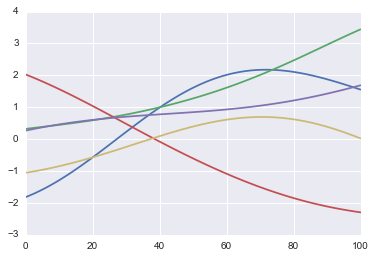

In [15]:
for _ in range(5):
    plt.plot(np.random.multivariate_normal(np.zeros(N), kernel(X, X, theta)))
plt.savefig('sampled_f.png', bbox_inches='tight')
plt.show()

D:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: covariance is not positive-semidefinite.


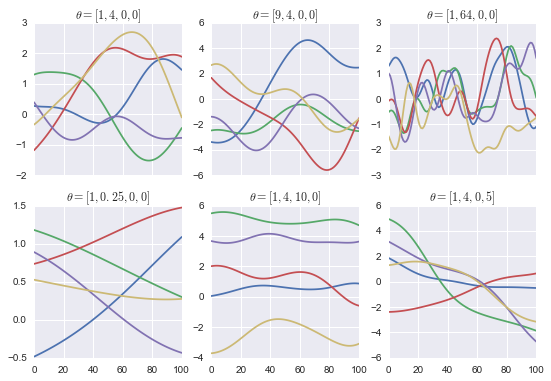

In [43]:
_, axs = plt.subplots(2, 3, sharex=True, figsize=(9, 6))
mus = np.zeros(N)
for theta, ax in zip(thetas, axs.flat):
    K = kernel(X, X, theta)
    for _ in range(5):
        ax.plot(np.random.multivariate_normal(mus, K))
    ax.set_title(r'$\theta=[%s]$' % ', '.join(map(lambda t: '%.2g'%t, theta)))
plt.savefig('sample_thetas', bbox_inches='tight', dpi=300)
plt.show()

In [45]:
D = np.array([[-0.5, 0.5],
              [0.2, -1],
              [0.3, 3],
              [-0.1, -2.5]])

In [49]:
N = 4
K = np.zeros((N, N))
X = D[:, 0, np.newaxis]
y = D[:, 1]
theta = np.ones(4)

K = kernel(X, X, theta)
beta = 1
C = K + 1/beta * np.eye(N)

In [90]:
Xtest = np.array([[5000]])
mus = np.zeros(Xtest.shape[0])
std = np.zeros(Xtest.shape[0])
theta = np.ones(4)
theta[0] = 0
theta[3] = 0
for i, x in enumerate(Xtest):
    k = kernel(X, x.reshape(1, -1), theta)
    kT_Cinv = k.T.dot(np.linalg.inv(C))
    mus[i] = kT_Cinv.dot(y)
    std[i] = k[-1] - kT_Cinv.dot(k)
print(mus)
print(std)

[ 0.08152964]
[ 0.53714873]


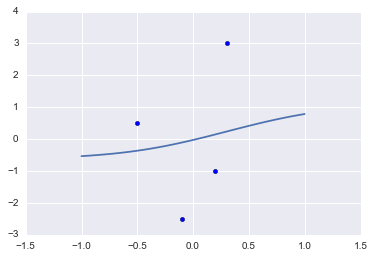

In [65]:
plt.scatter(X, y)
plt.plot(Xtest, mus)